In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Read in CSV file.
df = pd.read_csv("Delay_Causes_2015-2022.csv")

In [4]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,9,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",75.0,7.0,6.00,0.00,...,0.00,0.00,0.0,0.0,239.0,217.0,0.0,22.0,0.0,0.0
1,2022,9,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",45.0,2.0,0.89,0.00,...,0.00,1.00,0.0,1.0,160.0,17.0,0.0,2.0,0.0,141.0
2,2022,9,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,4.0,2.95,1.00,...,0.00,0.05,0.0,0.0,232.0,202.0,22.0,0.0,0.0,8.0
3,2022,9,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",27.0,5.0,3.54,0.00,...,0.00,0.00,0.0,0.0,247.0,216.0,0.0,31.0,0.0,0.0
4,2022,9,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,15.0,4.30,0.41,...,0.00,6.37,0.0,0.0,970.0,262.0,32.0,213.0,0.0,463.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130465,2015,1,WN,Southwest Airlines Co.,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
130466,2015,1,WN,Southwest Airlines Co.,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
130467,2015,1,WN,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
130468,2015,1,WN,Southwest Airlines Co.,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


In [5]:
# Show column header names Index.
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [6]:
# DF Types
print(df.dtypes)
print(df.count)

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object
<bound method DataFrame.count of         year  month carrier            carrier_name airport  \
0       2022      9      9E       Endeavor Air Inc.     ABY   
1       2022      9      9E       Endeavor Air Inc.     ACK   
2       2022      9      9E       Endeavor Air Inc.     AEX   
3       2022      9      9E       Endeavor Air Inc

In [7]:
# Clean the data; removed duplicate column types.
delay_df = df.drop(['arr_del15','carrier_ct','weather_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted'], axis=1, errors='ignore')
delay_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,nas_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,9,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",75.0,1.00,239.0,217.0,0.0,22.0,0.0,0.0
1,2022,9,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",45.0,0.11,160.0,17.0,0.0,2.0,0.0,141.0
2,2022,9,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,0.00,232.0,202.0,22.0,0.0,0.0,8.0
3,2022,9,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",27.0,1.46,247.0,216.0,0.0,31.0,0.0,0.0
4,2022,9,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,3.92,970.0,262.0,32.0,213.0,0.0,463.0


In [8]:
delay_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,nas_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,9,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",75.0,1.00,239.0,217.0,0.0,22.0,0.0,0.0
1,2022,9,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",45.0,0.11,160.0,17.0,0.0,2.0,0.0,141.0
2,2022,9,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,0.00,232.0,202.0,22.0,0.0,0.0,8.0
3,2022,9,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",27.0,1.46,247.0,216.0,0.0,31.0,0.0,0.0
4,2022,9,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",107.0,3.92,970.0,262.0,32.0,213.0,0.0,463.0


In [9]:
for column in delay_df.columns:
    print(f"Column {column} has {delay_df[column].isnull().sum()}null values")

Column year has 0null values
Column month has 0null values
Column carrier has 0null values
Column carrier_name has 0null values
Column airport has 0null values
Column airport_name has 0null values
Column arr_flights has 189null values
Column nas_ct has 189null values
Column arr_delay has 189null values
Column carrier_delay has 189null values
Column weather_delay has 189null values
Column nas_delay has 189null values
Column security_delay has 189null values
Column late_aircraft_delay has 189null values


In [10]:
airline_count = delay_df.groupby(['carrier_name']).sum()["arr_flights"]
airline_count

carrier_name
Alaska Airlines Inc.        1542426.0
Allegiant Air                505699.0
American Airlines Inc.      6353117.0
Delta Air Lines Inc.        6658102.0
Endeavor Air Inc.           1035574.0
Envoy Air                   1408788.0
ExpressJet Airlines Inc.    1607442.0
ExpressJet Airlines LLC      149234.0
Frontier Airlines Inc.       886285.0
Hawaiian Airlines Inc.       556591.0
Horizon Air                  183742.0
JetBlue Airways             1999823.0
Mesa Airlines Inc.           767385.0
PSA Airlines Inc.            991498.0
Republic Airline            1335117.0
SkyWest Airlines Inc.       5186165.0
Southwest Airlines Co.      9596381.0
Spirit Air Lines            1288794.0
US Airways Inc.              198715.0
United Air Lines Inc.       4105620.0
Virgin America               219675.0
Name: arr_flights, dtype: float64

In [11]:
# Sort by column
delay_df.sort_values(by=['arr_delay'], inplace = True, ascending=False)
delay_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,nas_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
100846,2017,4,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",20424.0,908.01,429194.0,151581.0,23334.0,107073.0,39.0,147167.0
109052,2016,8,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21977.0,804.36,395609.0,196944.0,8108.0,61036.0,321.0,129200.0
84907,2018,6,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21029.0,1515.76,370937.0,108068.0,19018.0,112018.0,167.0,131666.0
67790,2019,5,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13392.0,1317.75,329847.0,83637.0,23749.0,97283.0,92.0,125086.0
25783,2021,6,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13036.0,861.12,305694.0,105806.0,14883.0,53140.0,1112.0,130753.0


In [12]:
# Total weather delays by month of year.
total_delay_by_airline = delay_df.groupby(["month"]).sum()["weather_delay"]


Text(0.5, 1.0, 'Delays by Month')

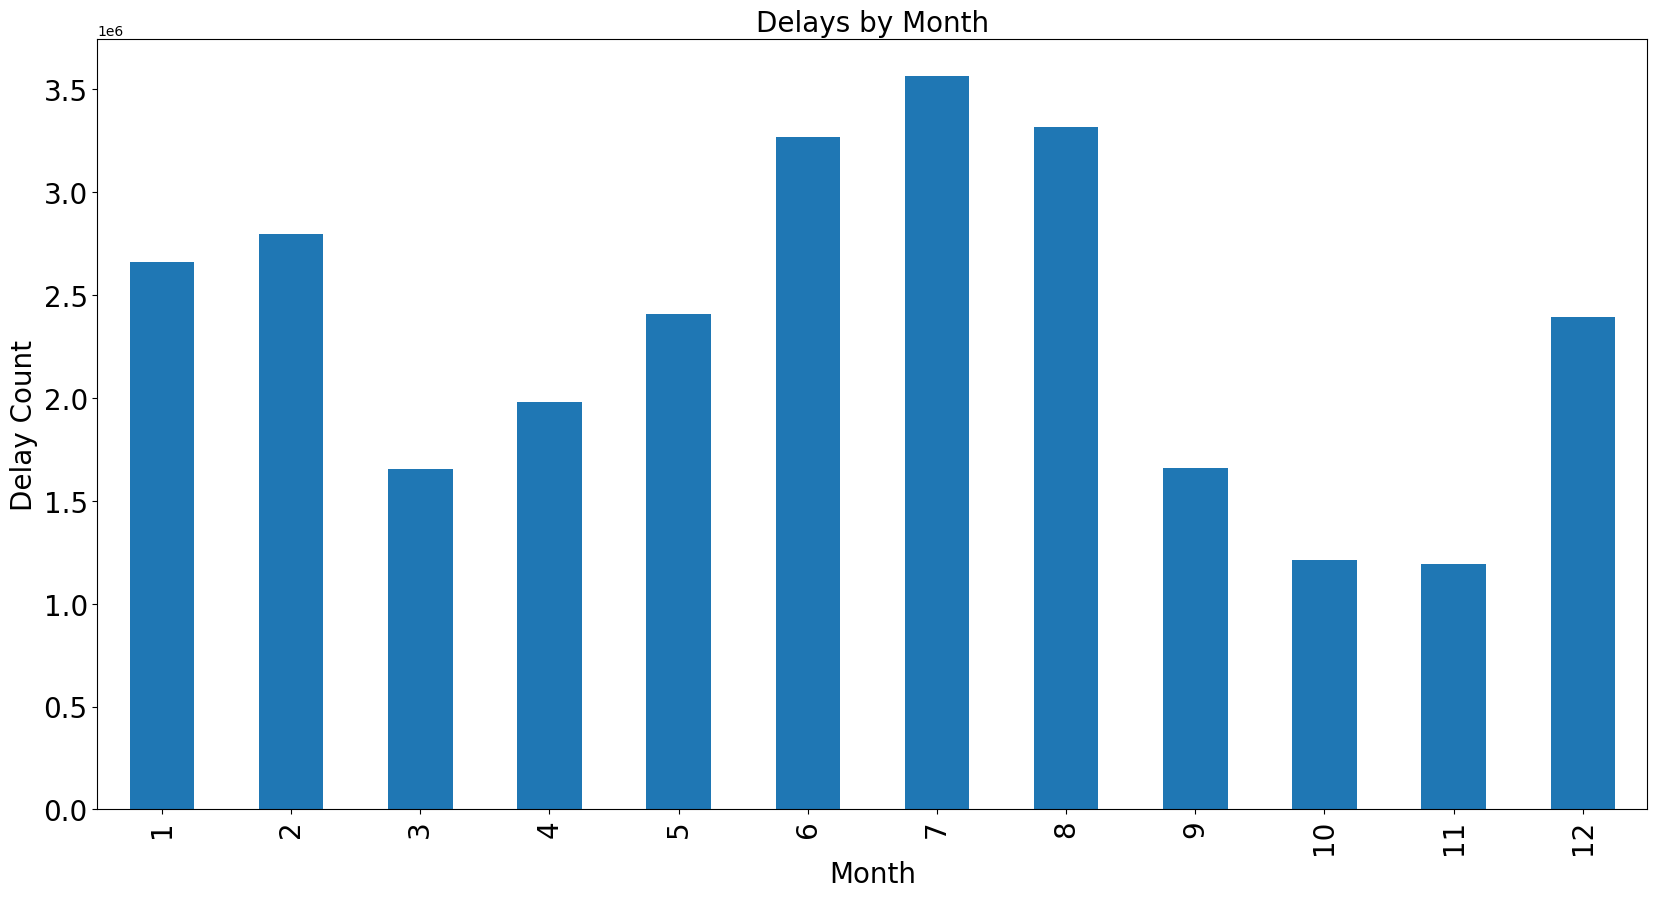

In [13]:
total_delay_by_airline.plot(figsize=(20,10),kind="bar")
plt.ylabel('Delay Count', fontsize='20')
plt.xlabel('Month', fontsize='20')
plt.yticks(fontsize='20')
plt.xticks(fontsize='20')
plt.title('Delays by Month', fontsize='20')

In [14]:
# Print out the airport value counts
airport_count = delay_df.airport.value_counts()
print(airport_count.shape)
delay_df.shape

(389,)


(130470, 14)

In [19]:
# Total weather delays by month of year.
total_delay_by_carrier_name = delay_df.groupby(["carrier_name"]).sum()["weather_delay"]
total_delay_by_carrier_name

carrier_name
Alaska Airlines Inc.         388313.0
Allegiant Air                542207.0
American Airlines Inc.      3999303.0
Delta Air Lines Inc.        4071933.0
Endeavor Air Inc.            776738.0
Envoy Air                   1612862.0
ExpressJet Airlines Inc.     550413.0
ExpressJet Airlines LLC      101006.0
Frontier Airlines Inc.       263594.0
Hawaiian Airlines Inc.        91885.0
Horizon Air                   49113.0
JetBlue Airways             1011993.0
Mesa Airlines Inc.          1046289.0
PSA Airlines Inc.            780161.0
Republic Airline             768307.0
SkyWest Airlines Inc.       5627050.0
Southwest Airlines Co.      2841688.0
Spirit Air Lines             594684.0
US Airways Inc.               70557.0
United Air Lines Inc.       2789097.0
Virgin America               115887.0
Name: weather_delay, dtype: float64

Text(0.5, 1.0, 'Weather Delays by Airline')

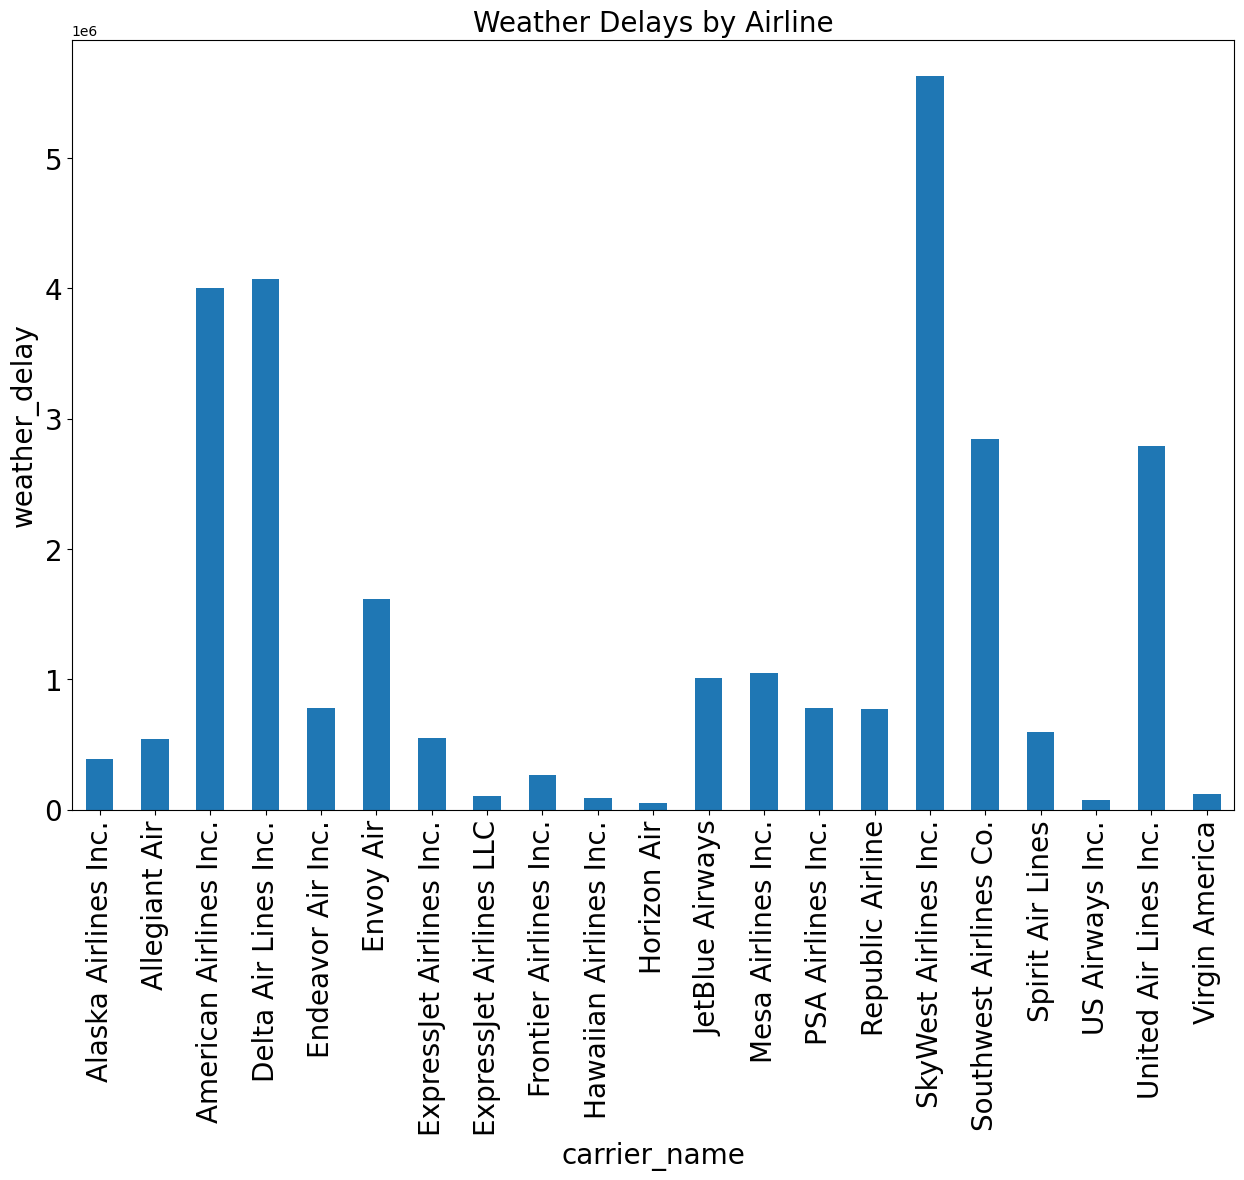

In [22]:
# Visualize the counts
total_delay_by_carrier_name.plot(figsize=(20,10),kind="bar")
plt.ylabel('weather_delay', fontsize='20')
plt.xlabel('carrier_name', fontsize='20')
plt.yticks(fontsize='20')
plt.xticks(fontsize='20')
plt.title('Weather Delays by Airline', fontsize='20')

In [ ]:
# Total weather delays by month of year.
total_delay_by_carrier_name = delay_df.groupby(["carrier_name"]).sum()["weather_delay"]
total_delay_by_carrier_name

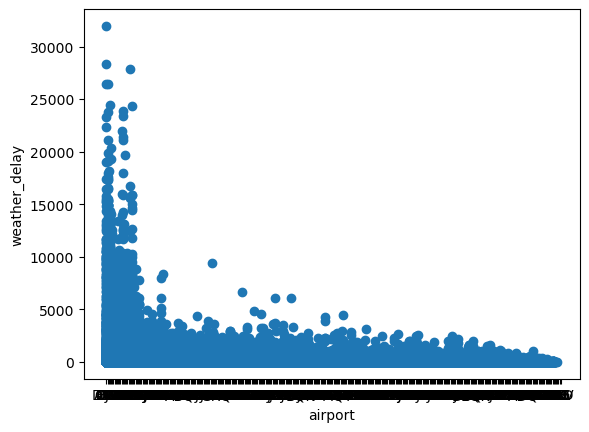

In [28]:

plt.scatter(delay_df.airport, delay_df.weather_delay)
plt.xlabel('airport')
plt.ylabel('weather_delay')
plt.show()


In [34]:
total_carrier_delay = delay_df.groupby(["carrier_name"]).sum()["nas_delay"]
total_carrier_delay.sort_values()

carrier_name
Hawaiian Airlines Inc.         44849.0
Horizon Air                   213177.0
US Airways Inc.               601963.0
ExpressJet Airlines LLC       927317.0
Virgin America               1175557.0
Allegiant Air                1427384.0
Mesa Airlines Inc.           1689245.0
PSA Airlines Inc.            1886069.0
Endeavor Air Inc.            2438930.0
Frontier Airlines Inc.       3661097.0
Alaska Airlines Inc.         3898624.0
Envoy Air                    4002556.0
Republic Airline             4557338.0
ExpressJet Airlines Inc.     5590119.0
JetBlue Airways              7870587.0
Spirit Air Lines             7903550.0
SkyWest Airlines Inc.        9866321.0
Southwest Airlines Co.      13655929.0
Delta Air Lines Inc.        14023535.0
United Air Lines Inc.       14054968.0
American Airlines Inc.      16355454.0
Name: nas_delay, dtype: float64

In [ ]:
# output_file_path = "./airlines_data.csv"
# airlines.to_csv(output_file_path, index=False)